Data Analysis Process    
Question—> Wrangle—>Explore—>Draw Conclusions—>Communicat    
Question: a question you want to answer; a problem you want to solv    
Wrangle:     
data acquisition, acquire the data you want to solve you problem
data cleaning

Explore:  
- build intuition
- find patterns

Draw conclusions:
make predictions
predict: which movies users will like
Conclude: users are less likely to click certain articles
Usually requires statistics or machine learning

Communicate:
- Blog post, paer, email, PPT, conversation
- Data Visualization is almost always useful


Data acquisition   
- Downloading files
- Accessing an API
- Scraping a web page
- Combine data from different formats


https://www.udacity.com/course/data-wrangling-with-mongodb--ud032


Data Format    
CVS -- Comma Separated Values   
Like a spreadsheet with no formulas    
Easy to process with code



In [1]:
import unicodecsv

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
# with 'with', at the end, the file will be closed automatically.
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [2]:
#Read data from files

import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)
enrollments = read_csv('enrollments.csv');
daily_engagements = read_csv('daily-engagement.csv');
submissions = read_csv('project-submissions.csv');

print(enrollments[0])
print(daily_engagements[0])
print(submissions[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
OrderedDict([('acct', '0'), ('utc_date', '09/01/2015'), ('num_courses_visited', '1'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0'), ('projects_completed', '0')])
OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [3]:
#methods to format the data type

from datetime import datetime as dt

#takes a date as a string, and returns a python date object
def parse_date(date):
    if date =='':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
#takes a date as a string, and returns a python date object
def parse_utc_date(date):
    if date =='':
        return None
    else:
        return dt.strptime(date, '%d/%m/%Y')

#takes a string which is either an empty string or represents an integer,
#returns an int or None
def parse_maybe_int(i):
    if i == '' or i == None:
        return None
    else:
        return int(i)


In [4]:
#format enrollments
#output: rerollments

for enrollment in enrollments:
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    #print(enrollment['days_to_cancel'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = (enrollment['is_canceled'] == 'True')
    enrollment['is_udacity'] = (enrollment['is_udacity'] == 'True')

enrollments[0]   

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [5]:
daily_engagements[0]

OrderedDict([('acct', '0'),
             ('utc_date', '09/01/2015'),
             ('num_courses_visited', '1'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0'),
             ('projects_completed', '0')])

In [6]:
#format daily_engagements
#output: daily_engagements
for engagement in daily_engagements:
    engagement['utc_date'] = parse_utc_date(engagement['utc_date'])
    engagement['num_courses_visited'] = int(float(engagement['num_courses_visited']))
    engagement['lessons_completed'] = int(float(engagement['lessons_completed']))
    engagement['projects_completed'] = int(float(engagement['projects_completed']))
    engagement['total_minutes_visited'] = float(engagement['total_minutes_visited'])
    
daily_engagements[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [7]:
submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [8]:
#format submissions
#output: submissions

for submission in submissions:
    submission['creation_date'] = parse_date(submission['creation_date'])
    submission['completion_date'] = parse_date(submission['completion_date'])
    
submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

Problems in the data     
1 Column named 'account_key' in two tables and acct in the third    
2 More unique students in enrollment than engagement table

In [9]:
#change 'acct' to 'account_key'

for engagement in daily_engagements:
    engagement['account_key'] = engagement['acct']
    del engagement['acct']

In [10]:
def get_unique_students(data):
    unique_students = set() #无序不重复集
    for element in data:
        unique_students.add(element['account_key'])
    return unique_students

In [11]:
len(enrollments)

1640

In [12]:
unique_enrollments = get_unique_students(enrollments)
len(unique_enrollments)

1302

In [13]:
len(daily_engagements)

136240

In [14]:
unique_daily_engagements = get_unique_students(daily_engagements)
len(unique_daily_engagements)

1237

In [15]:
len(submissions)

3642

In [16]:
unique_submissions = get_unique_students(submissions)
len(unique_submissions)

743

In [17]:
len(unique_enrollments) - len(unique_daily_engagements)

65

In [18]:
#identify surprising data points
for enrollment in enrollments:
    if enrollment['account_key'] not in unique_daily_engagements:
        print(enrollment)
        print()
        #break
#From the result, we can see that 
# 1 join_date and cancel_data are same

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])

OrderedDict([('account_key', '871'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 13, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 13, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])

OrderedDict([('account_key', '1218'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 15, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 15, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])

OrderedDict([('account_key', '654'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 12, 4, 0, 0)), ('cancel_date', datetime.datetime(2014, 12, 4, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])

OrderedDict([('account_key', '65

In [19]:
num = 0
for enrollment in enrollments:
    if enrollment['account_key'] not in unique_daily_engagements:
        if enrollment['join_date'] != enrollment['cancel_date']:
            num +=1
            print(enrollment)
            print()

print(num)

#From the result, we can learn that
# 2 the 'is_udacity' is True

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])

OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])

3


In [20]:
#add udacity test accounts to udacity_test_accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])

len(udacity_test_accounts)

6

In [21]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for element in data:
        if element['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(element)
    return non_udacity_data
            

In [22]:
#remove udacity test accounts
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagements = remove_udacity_accounts(daily_engagements)
non_udacity_submissions = remove_udacity_accounts(submissions)

print(len(enrollments))
print(len(non_udacity_enrollments))

print(len(daily_engagements))
print(len(non_udacity_engagements))

print(len(submissions))
print(len(non_udacity_submissions))

1640
1622
136240
135656
3642
3634


In [23]:
print(len(get_unique_students(non_udacity_enrollments)))
print(len(get_unique_students(non_udacity_engagements)))


1296
1234


Explore Phase    
non_udacity_enrollments    
non_udacity_engagements    
non_udacity_submissions

Question:     
How do numbers in the daily engagement table differ for students who pass the first project?
problems:    
1. this will include data from after the project submission    
2. This compares data from different lengths of time
   if we do only look at engagement from before the first submission and students submit after different lengths of time, then we are comparing engagement data from different lengths of time, but students' engagement might have trends over time.
3. Includes engagement in courses not related to the first project.

Revision: Only look at engagement from first week, and exclude students who cancel within a week.


In [24]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if enrollment['days_to_cancel'] == None or enrollment['days_to_cancel'] >7:
        key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if key not in paid_students or \
        enrollment_date > paid_students[key]:
            paid_students[key]=enrollment_date

len(paid_students)

995

In [25]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return (time_delta.days >= 0 and time_delta.days < 7)

In [26]:
#solution by ghwan

#create a list of rows from the engagement table
#including students where student is one of the paid students
#and the date is within one week of the student's join date
paid_engagement_in_first_week = []
for engagement in non_udacity_engagements:
    if engagement['account_key'] in paid_students:
        date1 = paid_students[engagement['account_key']]
        date2 = engagement['utc_date']
        if within_one_week(date1,date2):
            paid_engagement_in_first_week.append(engagement)
            
len(paid_engagement_in_first_week)        

6919

In [27]:
#solution by instructor

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [28]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements = remove_free_trial_cancels(non_udacity_engagements)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submissions))

1293
134549
3618


In [29]:
paid_engagement_in_first_week = []
for engagement in paid_engagements:
    join_date = paid_students[engagement['account_key']]
    engagement_date = engagement['utc_date']
    if within_one_week(join_date,engagement_date):
        paid_engagement_in_first_week.append(engagement)
        #for test
        #if engagement['account_key'] == '108':
            #print(join_date)
            #print(engagement_date)
            
len(paid_engagement_in_first_week) 

6919

In [30]:
len(paid_engagement_in_first_week)

6919

In [31]:
#Average minutes a student spent in classroom

#arrange engagements according to students
#output: a dictionary, key: account key , value: lists of engagements

from collections import defaultdict
engagements_by_account = defaultdict(list)
for engagement in paid_engagement_in_first_week:
    key = engagement['account_key']
    engagements_by_account[key].append(engagement)



In [32]:
len(engagements_by_account)

995

In [33]:
total_minutes_by_account = {}
for account_key, engagements_for_student in engagements_by_account.items():
    total_minutes = 0
    for engagement in engagements_for_student:
        total_minutes += engagement['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [34]:
len(total_minutes_by_account)

995

In [35]:
total_minutes = total_minutes_by_account.values()

import numpy as np
total_minutes = list(total_minutes)

print('Mean:', np.mean(total_minutes))
print('Standard deviation:', np.std(total_minutes))
print('Minimum:', np.min(total_minutes))
print('Maximum:', np.max(total_minutes))

#the minutes of a week: 10080

Mean: 306.708326753
Standard deviation: 412.99693341
Minimum: 0.0
Maximum: 3564.7332645


#### problems about the average minutes above
1. Identify surpring data points
   it is more than the hours a week 168*24(10080).
2. Point out one or a few surpring points
3. Fix any problems


In [36]:
total_minutes_by_account = {}
for account_key, engagements_for_student in engagements_by_account.items():
    total_minutes = 0
    for engagement in engagements_for_student:
        total_minutes += engagement['total_minutes_visited']
        #for test
        #if account_key == '108':
         #   print(engagement['utc_date'])
          #  print(engagement['total_minutes_visited'])
    if total_minutes > 10080:#24*60*7
        print(account_key,total_minutes)

In [37]:
print(paid_students['108'])

2015-04-20 00:00:00


In [38]:
#the problem is within_one_week()

In [39]:
#Lessons Completed in First Week

In [40]:
from collections import defaultdict

def group_data(data, key_name):
    group_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        group_data[key].append(data_point)
    return group_data 


In [41]:
engagements_by_account = group_data(paid_engagement_in_first_week,'account_key')


In [42]:
#data should be a dictionary whose key is 'account_key'
#output: a dictionary with 'account_key' as a key


#total_lessons_by_account = {}
#for account_key, engagements_for_student in engagements_by_account.items():
#    total_lessons = 0
#    for engagement in engagements_for_student:
#        total_lessons += engagement['lessons_completed']
#    total_lessons_by_account[account_key] = total_lessons
    

def sum_grouped_items(grouped_data, field_name):
    total_by_account = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        total_by_account[key] = total
        
    return total_by_account
    

In [43]:
total_lessons_by_account = sum_grouped_items(engagements_by_account,'lessons_completed')

In [44]:
import numpy as np
#data should be a list
def describe_data(data):
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))


In [45]:
total_lessons = total_lessons_by_account.values()
total_lessons = list(total_lessons)
describe_data(total_lessons)

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [46]:
#To analyze the number of days the student visited the classroom:

In [47]:
def sum_grouped_items_flag(grouped_data, field_name):
    total_by_account = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            if data_point[field_name] > 0:
                total += 1
        total_by_account[key] = total
        
    return total_by_account

In [48]:
total_days_visited_classroom_by_account = sum_grouped_items_flag(engagements_by_account,'num_courses_visited')

In [49]:
total_days = total_days_visited_classroom_by_account.values()
total_days = list(total_days)
describe_data(total_days)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


In [50]:
#solution by instructor
#add 'has visited' field
for engagement in paid_engagement_in_first_week:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0

In [51]:
total_days_visited_classroom_by_account2 = sum_grouped_items(engagements_by_account,'has_visited')

In [52]:
total_days2 = total_days_visited_classroom_by_account2.values()
total_days2 = list(total_days2)
describe_data(total_days2)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


In [53]:
#Splitting out Passing Students
#Split the engagement data into two lists:
#passing_engagement:
# records for students who pass the subway project

#non_passing_engagement:
# Records for students who do not


#paid_enrollments
#paid_engagements
#paid_submissions

In [54]:
subway_project_lesson_keys = ['746169184', '3176718735']

In [55]:
for submission in paid_submissions:
    print(submission)
    break

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [56]:
passing_students = []
for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    account_key = submission['account_key']
    
    if ((project in subway_project_lesson_keys) and (rating == 'PASSED' or rating == 'DISTINCTION')):
            if account_key not in passing_students:
                passing_students.append(account_key)

In [57]:
len(passing_students)

647

In [58]:
for engagement_record in paid_engagement_in_first_week:
    print(engagement_record)
    break

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])


In [59]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    if account_key in passing_students:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

In [60]:
len(passing_engagement)

4527

In [61]:
len(non_passing_engagement)

2392

In [62]:
#solution by instructor
subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)


647

In [63]:

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


In [64]:
#Comparing Students who pass to Those who Don't
#e.g.
# Mniutes spent, lessons compelte, days visited
# Are these students more likely to complete other projects
# Look at the more granular data in Daily_engagement_full.csv

In [65]:

#passing_engagement
#non_passing_engagement


In [66]:
for engagement in passing_engagement:
    print(engagement)
    break

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '0'), ('has_visited', 1)])


In [67]:
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

In [68]:
total_minutes_by_account = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
total_minutes_by_account_non = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')

In [69]:
total_minutes = total_minutes_by_account.values()
total_minutes = list(total_minutes)
describe_data(total_minutes)

Mean: 394.586046483
Standard deviation: 448.49951933
Minimum: 0.0
Maximum: 3564.7332645


In [70]:
total_minutes_non = total_minutes_by_account_non.values()
total_minutes_non = list(total_minutes_non)
describe_data(total_minutes_non)

Mean: 143.326474266
Standard deviation: 269.538619008
Minimum: 0.0
Maximum: 1768.5227493


In [71]:
#Communicate

Mean: 394.586046483
Standard deviation: 448.49951933
Minimum: 0.0
Maximum: 3564.7332645


(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

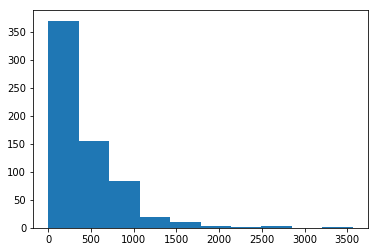

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt

total_minutes = total_minutes_by_account.values()
total_minutes = list(total_minutes)
describe_data(total_minutes)

plt.hist(total_minutes)

Mean: 143.326474266
Standard deviation: 269.538619008
Minimum: 0.0
Maximum: 1768.5227493


(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454986,   530.55682479,
          707.40909972,   884.26137465,  1061.11364958,  1237.96592451,
         1414.81819944,  1591.67047437,  1768.5227493 ]),
 <a list of 10 Patch objects>)

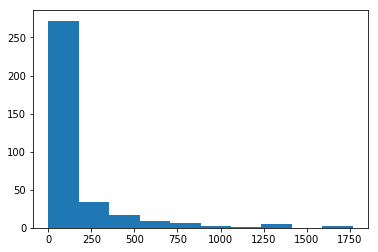

In [73]:
total_minutes_non = total_minutes_by_account_non.values()
total_minutes_non = list(total_minutes_non)
describe_data(total_minutes_non)

plt.hist(total_minutes_non)


(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454986,   530.55682479,
          707.40909972,   884.26137465,  1061.11364958,  1237.96592451,
         1414.81819944,  1591.67047437,  1768.5227493 ]),
 <a list of 10 Patch objects>)

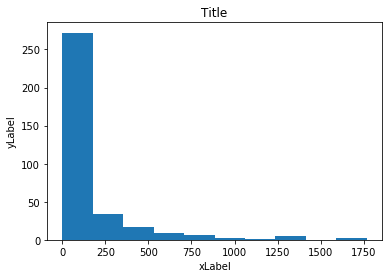

In [76]:
#add title
plt.title('Title')

#add axis labels
plt.xlabel("xLabel")
plt.ylabel('yLabel')
plt.hist(total_minutes_non)

(array([ 169.,   41.,   28.,   23.,   11.,   10.,    6.,    9.,    5.,
           4.,    5.,    5.,    4.,    2.,    1.,    1.,    0.,    2.,
           3.,    3.,    2.,    1.,    0.,    1.,    2.,    0.,    1.,
           1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    2.,    2.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    2.]),
 array([    0.        ,    35.37045499,    70.74090997,   106.11136496,
          141.48181994,   176.85227493,   212.22272992,   247.5931849 ,
          282.96363989,   318.33409487,   353.70454986,   389.07500485,
          424.44545983,   459.81591482,   495.1863698 ,   530.55682479,
          565.92727978,   601.29773476,   636.66818975,   672.03864473,
          707.40909972,   742.77955471,   778.15000969,   813.52046468,
          848.89091966,   884.26137465,   919.63182964,   955.00228462,
          990.37273961,  1025.74319459,  1061.11364958,  1096.48410457,
         1131.85455955, 

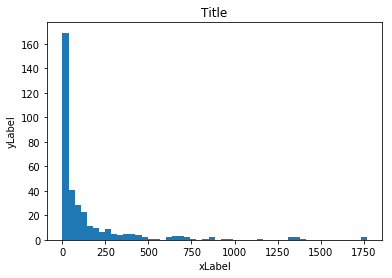

In [82]:
#seaborn: to make matplotlib plots look nicer
# conda install seaborn
import seaborn as sns



#add title
plt.title('Title')

#add axis labels
plt.xlabel("xLabel")
plt.ylabel('yLabel')

plt.hist(total_minutes_non,bins=50)# would make sure your histogram has 50 bins

Text(0.5,1,'Distribution of classroom visits in the first week for students who pass the subway project')

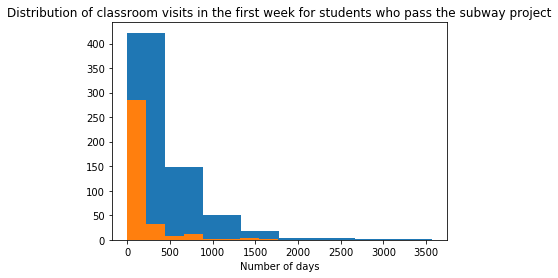

In [83]:
import seaborn as sns

plt.hist(total_minutes, bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(total_minutes_non, bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

In [ ]:
# Data Analysis and Related Terms

In [ ]:
#1. DATA Science
# - Similiar to data analysis
# - More focused on building systems, like recommandation system or a ranking system
# - may require more experience

#2. Data Engineering
# - More focused on data wrangling. They make data pipelines and insure that data collecitons is fault tolerant and scales well.
# - they are more involved in storing and processing data
# and less involved in drawing conclusions based on the data

#3. Big Data
# - Fuzzy term for ' a lot of data'
#  terebytes, peterbytes and more
# - Data analyst scientists and data engineers can all
# work with big data.
